In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 3.4MB/s 
     |████████████████████████████████| 6.5MB 21.6MB/s 
     |████████████████████████████████| 15.3MB 249kB/s 


In [ ]:
import numpy as np
import pandas as pd

import descartes
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

from sklearn.preprocessing import normalize 
from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
prec_data = pd.read_csv("precipitation_centers.csv")
prec_data.head()

,ID,NAME,ADDRESS,STATE,LATITUDE,LONGITUDE,TYPE,01_2010,02_2010,03_2010,04_2010,05_2010,06_2010,07_2010,08_2010,09_2010,10_2010,11_2010,12_2010,01_2011,02_2011,03_2011,04_2011,05_2011,06_2011,07_2011,08_2011,09_2011,10_2011,11_2011,12_2011,01_2012,02_2012,03_2012,04_2012,05_2012,06_2012,07_2012,08_2012,09_2012,...,10_2017,11_2017,12_2017,01_2018,02_2018,03_2018,04_2018,05_2018,06_2018,07_2018,08_2018,09_2018,10_2018,11_2018,12_2018,01_2019,02_2019,03_2019,04_2019,05_2019,06_2019,07_2019,08_2019,09_2019,10_2019,11_2019,12_2019,01_2020,02_2020,03_2020,04_2020,05_2020,06_2020,07_2020,08_2020,09_2020,10_2020,11_2020,12_2020,elevation
0,63072758,MERCY HOSPITAL ROGERS,2710 RIFE MEDICAL LANE,AR,36.308993,-94.182978,HOSPITAL,98,69,137,92,261,147,177,34,326,42,112,33,20,146,99,465,314,51,40,115,153,79,265,100,69,78,198,117,65,67,44,125,133,...,149,47,74,70,289,171,101,175,93,160,186,109,119,91,170,157,127,119,189,305,283,118,235,163,310,181,45,281,107,270,233,305,98,192,147,136,264,94,117,143
1,31233525,ADVENT HEALTH DADE CITY,13100 FORT KING RD,FL,28.347963,-82.200720,HOSPITAL,119,112,256,138,104,193,213,334,169,13,78,27,200,52,280,60,66,155,227,276,236,164,40,15,50,52,56,80,134,595,210,354,201,...,111,57,45,139,55,60,143,323,216,332,289,185,52,64,275,147,81,63,107,130,347,371,327,98,167,90,146,35,80,17,202,114,261,267,308,241,84,170,77,133
2,7233484,DELRAY MEDICAL CENTER,5352 LINTON BLVD,FL,26.437193,-80.127788,HOSPITAL,50,149,217,232,122,226,213,261,316,65,47,42,79,10,74,74,105,202,199,371,243,398,26,33,18,107,71,214,319,366,228,530,293,...,347,141,28,78,16,18,170,534,306,239,203,196,73,52,49,172,108,70,69,172,347,205,375,70,199,84,228,37,109,9,113,547,275,396,250,375,431,295,39,133
3,36034758,POINCIANA MEDICAL CENTER,325 CYPRESS PKWY,FL,28.144781,-81.476688,HOSPITAL,90,125,288,132,123,223,202,286,220,13,74,27,170,29,234,46,74,242,220,284,177,329,14,31,20,56,51,63,142,462,154,316,218,...,162,31,34,93,32,33,103,316,280,340,242,146,58,63,209,133,87,46,79,139,327,334,306,101,163,68,147,23,75,7,166,226,290,284,288,244,102,159,55,133
4,36232068,ASSENCION ST. VINCENT'S MEDICAL CENTER CLAY CO...,1670 ST. VINCENT'S WAY,FL,30.108762,-81.832689,HOSPITAL,170,150,132,64,135,236,181,206,124,10,59,29,187,154,107,81,81,211,201,153,178,128,75,52,28,64,124,60,233,618,125,355,182,...,105,79,86,139,61,86,191,241,253,271,221,99,68,134,265,169,61,76,101,83,235,253,265,72,170,99,170,34,126,69,206,119,267,240,299,219,108,85,78,133


In [ ]:
world = gpd.read_file("cb_2018_us_county_500k.shp")
arkansas = world[world['STATEFP']=='05']
florida = world[world['STATEFP']=='12']

In [ ]:
map_data = prec_data[prec_data['STATE']=='AR'].copy()

X= StandardScaler().fit_transform(map_data.iloc[:,7:-1])
brc = Birch(n_clusters=3, threshold=0.5).fit(X)
brc.labels_ 


array([2, 2, 2, 0, 0, 2, 1, 2, 2, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1,
       0, 1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 2,
       0, 0, 2, 2, 2, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 2, 2, 1, 1, 2, 1, 0,
       1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 2, 1,
       1, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 1,
       1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 0, 0, 0, 2, 1, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1,
       1, 2, 0, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 2,

No handles with labels found to put in legend.


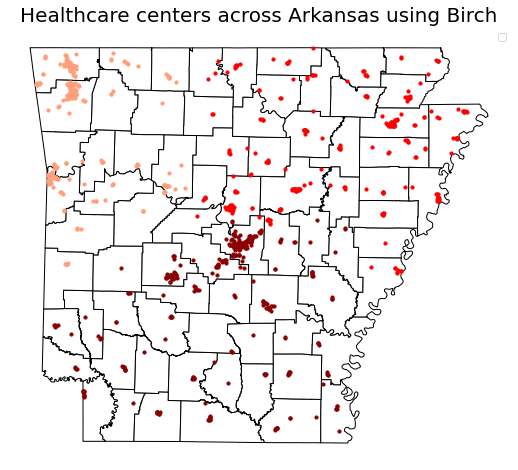

In [ ]:
map_data['Cluster'] = brc.labels_
map_data['Cluster'] = map_data['Cluster'].astype('category')

map_data.head()

ax = arkansas.plot(color = 'white', linewidth = 1, edgecolor = 'black', figsize = (12, 8))

centers_ar = map_data
points = [Point(xy) for xy in zip(centers_ar["LONGITUDE"], centers_ar["LATITUDE"])]
centers_ar = gpd.GeoDataFrame(centers_ar, crs = {'init': 'epsg:4326'}, geometry = points)

centers_ar[centers_ar["Cluster"] == 0].plot(color = 'red', ax = ax, markersize = 10)
centers_ar[centers_ar["Cluster"] == 1].plot(color = 'darkred', ax = ax, markersize = 10)
centers_ar[centers_ar["Cluster"] == 2].plot(color = 'lightsalmon', ax = ax, markersize = 10)


plt.title("Healthcare centers across Arkansas using Birch", fontsize = 20)
ax.axis('off')
plt.legend()

In [ ]:
print(centers_ar[centers_ar['Cluster']==0].iloc[:,7:-3].mean(axis=1).mean())
print(centers_ar[centers_ar['Cluster']==1].iloc[:,7:-3].mean(axis=1).mean())
print(centers_ar[centers_ar['Cluster']==2].iloc[:,7:-3].mean(axis=1).mean())

159.53945916114793
164.23170383076032
154.0913735051667


In [ ]:
map_data = prec_data[prec_data['STATE']=='FL'].copy()

X= StandardScaler().fit_transform(map_data.iloc[:,7:-1])
brc = Birch(n_clusters=6, threshold=0.5).fit(X)
brc.labels_ 

array([0, 1, 4, ..., 4, 0, 0])

No handles with labels found to put in legend.


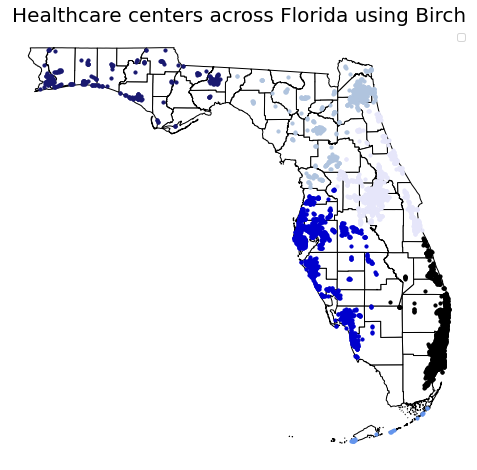

In [ ]:
map_data['Cluster'] = brc.labels_
map_data['Cluster'] = map_data['Cluster'].astype('category')

map_data.head()

ax = florida.plot(color = 'white', linewidth = 1, edgecolor = 'black', figsize = (12, 8))

centers_fl = map_data
points = [Point(xy) for xy in zip(centers_fl["LONGITUDE"], centers_fl["LATITUDE"])]
centers_fl = gpd.GeoDataFrame(centers_fl, crs = {'init': 'epsg:4326'}, geometry = points)

centers_fl[centers_fl["Cluster"] == 0].plot(color = 'mediumblue', ax = ax, markersize = 10)
centers_fl[centers_fl["Cluster"] == 1].plot(color = 'black', ax = ax, markersize = 10)
centers_fl[centers_fl["Cluster"] == 2].plot(color = 'lightsteelblue', ax = ax, markersize = 10)
centers_fl[centers_fl["Cluster"] == 3].plot(color = 'midnightblue', ax = ax, markersize = 10)
centers_fl[centers_fl["Cluster"] == 4].plot(color = 'lavender', ax = ax, markersize = 10)
centers_fl[centers_fl["Cluster"] == 5].plot(color = 'cornflowerblue', ax = ax, markersize = 10)


plt.title("Healthcare centers across Florida using Birch", fontsize = 20)
ax.axis('off')
plt.legend()

In [ ]:
print(centers_fl[centers_fl['Cluster']==0].iloc[:,7:-3].mean(axis=1).mean())
print(centers_fl[centers_fl['Cluster']==1].iloc[:,7:-3].mean(axis=1).mean())
print(centers_fl[centers_fl['Cluster']==2].iloc[:,7:-3].mean(axis=1).mean())
print(centers_fl[centers_fl['Cluster']==3].iloc[:,7:-3].mean(axis=1).mean())
print(centers_fl[centers_fl['Cluster']==4].iloc[:,7:-3].mean(axis=1).mean())
print(centers_fl[centers_fl['Cluster']==5].iloc[:,7:-3].mean(axis=1).mean())

166.15453802125853
177.68138887143735
157.1841358131988
176.998124330118
154.27421354803613
157.72417355371897
